Import core libraries for data process and visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a list of seasons and list of teams, the team names must match how they are presented on https://www.pro-football-reference.com/teams/

In [6]:
seasons_list = [str(season) for season in range(2010,2025)]
print(f'Number of seasons = {len(seasons_list)}')

team_names_list = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx','clt','jax','kan','sdg','ram','rai','mia','min','nwe','nor','nyg','nyj','phi','pit','sea','sfo','tam','oti','was']

print(f'Number of teams = {len(team_names_list)}')

Number of seasons = 15
Number of teams = 32


Scrape Pro-Football_Reference for team data. Iterate through every season by team and pull their offensive and defensive data.

In [ ]:
import random
import time
nfl_df = pd.DataFrame()

for season in seasons_list:

  for team in team_names_list:
    url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '/gamelog/'
    print(url)

    offense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-game-log'})[0]
    
    defense_df = pd.read_html(url, header = 1, attrs={'id':'table_pfr_team-year_game-logs_team-year-regular-season-opponent-game-log'})[0]
    
    team_df = pd.concat([offense_df,defense_df],axis=1)

    team_df.insert(loc=0,column='Season',value=season)
    team_df.insert(loc=2,column='Team',value=team)

    nfl_df = pd.concat([nfl_df,team_df], ignore_index=True)
    
    time.sleep(random.randint(7,8))

print(nfl_df)

Note: If the scraping fails try two things.

1: increase the sleep timer so as to not time out on pro-football-reference.com . See this website for updates on their web scraping rules. https://www.sports-reference.com/bot-traffic.html

2: Use the data I posted directly in the GitHub repository instead

To ensure reproducibility and avoid repeated web scraping, save the scraped data to a CSV file below. If you have the data already you can skip the scraping and this step

In [ ]:
if not nfl_df.empty:
    nfl_df.to_csv('team_stats_no_odds.csv', index=False)
    print('Data saved to team_stats_no_odds.csv')
else:
    print('Warning: nfl_df is empty. CSV not saved')


Data saved to team_stats_no_odds.csv


In [ ]:
# Genereate lists and dataframes to scrape odds
#This list of team names must match the way team names are displayed on sports odds history
odds_team_names = ['ARZ', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GBP', 'HOU', 'IND', 'JAC', 'KCC', 'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NEP', 'NOS', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SFF', 'TBB', 'TEN', 'WAS']

#create pre-2010s odds DF
odds_df = pd.DataFrame()
#create 2010s betting DF
twentytens_odds_df = pd.DataFrame()
#create final odds df
total1_odds_df = pd.DataFrame()

Iterate through each team and grab all of their betting and odds data and place it into one DF. If this does not work, check sportsoddhistory.com for their scraping rules and uncomment the time.sleep in order to ensure that you do not go over their limit.

In [ ]:
for team in odds_team_names:
  url = 'https://www.sportsoddshistory.com/nfl-game-team/?tm=' + team
  tens_url = 'https://www.sportsoddshistory.com/nfl-game-team/?tm='+ team + '&d=2010#2019'
  print(url)
  print(tens_url)
  odds_df = pd.read_html(url)
  twentytens_odds_df = pd.read_html(tens_url)
  # Combine 2000 and 2010 data
  odds_df = pd.concat([odds_df[2],twentytens_odds_df[2]], ignore_index=True)
  
  odds_df.insert(loc=2,column='Team',value=team)
  
  total1_odds_df = pd.concat([total1_odds_df,odds_df], ignore_index=True)

  #time.sleep(random.randint(3,4))

#odds_df.head(20)

https://www.sportsoddshistory.com/nfl-game-team/?tm=ARZ
https://www.sportsoddshistory.com/nfl-game-team/?tm=ARZ&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=ATL
https://www.sportsoddshistory.com/nfl-game-team/?tm=ATL&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=BAL
https://www.sportsoddshistory.com/nfl-game-team/?tm=BAL&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=BUF
https://www.sportsoddshistory.com/nfl-game-team/?tm=BUF&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CAR
https://www.sportsoddshistory.com/nfl-game-team/?tm=CAR&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CHI
https://www.sportsoddshistory.com/nfl-game-team/?tm=CHI&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CIN
https://www.sportsoddshistory.com/nfl-game-team/?tm=CIN&d=2010#2019
https://www.sportsoddshistory.com/nfl-game-team/?tm=CLE
https://www.sportsoddshistory.com/nfl-game-team/?tm=CLE&d=2010#2019
https://

,0,1,Team,2,3,4,5,6,7,8,9
0,1,Sun,WAS,"Sep 8, 2024",4:25,@,Tampa Bay Buccaneers,L 20-37,L +4,O 42.5,NaN
1,2,Sun,WAS,"Sep 15, 2024",1:00,NaN,New York Giants,W 21-18,W -1.5,U 43,NaN
2,3,Mon,WAS,"Sep 23, 2024",8:15,@,Cincinnati Bengals,W 38-33,W +7.5,O 46.5,NaN
3,4,Sun,WAS,"Sep 29, 2024",4:05,@,Arizona Cardinals,W 42-14,W +3.5,O 48.5,NaN
4,5,Sun,WAS,"Oct 6, 2024",1:00,NaN,Cleveland Browns,W 34-13,W -3,O 43.5,NaN
5,6,Sun,WAS,"Oct 13, 2024",1:00,@,Baltimore Ravens,L 23-30,P +7,O 50.5,NaN
6,7,Sun,WAS,"Oct 20, 2024",4:05,NaN,Carolina Panthers,W 40-7,W -10,U 51,NaN
7,8,Sun,WAS,"Oct 27, 2024",4:25,NaN,Chicago Bears,W 18-15,W -1.5,U 46.5,NaN
8,9,Sun,WAS,"Nov 3, 2024",1:00,@,New York Giants,W 27-22,W -4,O 44,NaN
9,10,Sun,WAS,"Nov 10, 2024",1:00,NaN,Pittsburgh Steelers,L 27-28,L -2,O 45.5,NaN


Ensure that the data is properly captured in the DF

In [18]:
total1_odds_df.head(20)

,0,1,Team,2,3,4,5,6,7,8,9
0,1,Sun,ARZ,"Sep 8, 2024",1:00,@,Buffalo Bills,L 28-34,W +6.5,O 46,NaN
1,2,Sun,ARZ,"Sep 15, 2024",4:05,NaN,Los Angeles Rams,W 41-10,W -1,O 47.5,NaN
2,3,Sun,ARZ,"Sep 22, 2024",4:25,NaN,Detroit Lions,L 13-20,L +3,U 51.5,NaN
3,4,Sun,ARZ,"Sep 29, 2024",4:05,NaN,Washington Commanders,L 14-42,L -3.5,O 48.5,NaN
4,5,Sun,ARZ,"Oct 6, 2024",4:05,@,San Francisco 49ers,W 24-23,W +7.5,U 49,NaN
5,6,Sun,ARZ,"Oct 13, 2024",1:00,@,Green Bay Packers,L 13-34,L +5.5,P 47,NaN
6,7,Mon,ARZ,"Oct 21, 2024",9:00,NaN,Los Angeles Chargers,W 17-15,W +1,U 44.5,NaN
7,8,Sun,ARZ,"Oct 27, 2024",1:00,@,Miami Dolphins,W 28-27,W +5,O 46.5,NaN
8,9,Sun,ARZ,"Nov 3, 2024",4:05,NaN,Chicago Bears,W 29-9,W -1.5,U 44.5,NaN
9,10,Sun,ARZ,"Nov 10, 2024",4:25,NaN,New York Jets,W 31-6,W +2,U 46,NaN


Checkpoint save a CSV again

In [19]:
total1_odds_df.to_csv('nfl_odds_data.csv', index=False)

In [10]:
# Create a DataFrame to hold the corrected odds data
total1_odds_df = pd.read_csv('nfl_odds_data.csv')

# Print columns for debugging
print('Columns after reading CSV:', total1_odds_df.columns.tolist())

# Try to convert first 10 columns to int if possible (for legacy CSVs with integer columns)
def try_convert_columns_to_int(cols):
    new_cols = []
    for col in cols:
        if isinstance(col, str) and col.isdigit():
            new_cols.append(int(col))
        else:
            new_cols.append(col)
    return new_cols

if all(isinstance(col, str) and col.isdigit() for col in total1_odds_df.columns[:10]):
    total1_odds_df.columns = try_convert_columns_to_int(total1_odds_df.columns)

# Print columns after possible conversion
print('Columns after conversion:', total1_odds_df.columns.tolist())

# Try to rename columns 
rename_dict = {}
if 0 in total1_odds_df.columns:
    rename_dict = {0:'Week',1:'Day',2:'Date',3:'Time',4:'H/A',5:'Opp',6:'Result',7:'Spread Result',8:'O/U',9:'Notes'}
elif '0' in total1_odds_df.columns:
    rename_dict = {'0':'Week','1':'Day','2':'Date','3':'Time','4':'H/A','5':'Opp','6':'Result','7':'Spread Result','8':'O/U','9':'Notes'}
else:
    # Try to infer columns by position if possible
    col_list = list(total1_odds_df.columns)
    if len(col_list) >= 10:
        rename_dict = {col_list[0]:'Week', col_list[1]:'Day', col_list[2]:'Date', col_list[3]:'Time', col_list[4]:'H/A', col_list[5]:'Opp', col_list[6]:'Result', col_list[7]:'Spread Result', col_list[8]:'O/U', col_list[9]:'Notes'}

if rename_dict:
    total1_odds_df = total1_odds_df.rename(columns=rename_dict)
    print('Columns after renaming:', total1_odds_df.columns.tolist())
else:
    print('Could not determine columns to rename. Columns are:', total1_odds_df.columns.tolist())

# Reverse the order of the rows
correct_odds_df = total1_odds_df.iloc[::-1]
# Reset the index
correct_odds_df = correct_odds_df.reset_index(drop=True)

# Convert the 'Date' column to datetime if it exists
if 'Date' in correct_odds_df.columns:
    correct_odds_df['Date'] = pd.to_datetime(correct_odds_df['Date'], errors='coerce')
else:
    print('Warning: "Date" column not found after renaming!')

Columns after reading CSV: ['0', '1', 'Team', '2', '3', '4', '5', '6', '7', '8', '9']
Columns after conversion: ['0', '1', 'Team', '2', '3', '4', '5', '6', '7', '8', '9']
Columns after renaming: ['Week', 'Day', 'Team', 'Date', 'Time', 'H/A', 'Opp', 'Result', 'Spread Result', 'O/U', 'Notes']


In [11]:
# Clean and refine the DataFrame
cleaned_odds_df = correct_odds_df[pd.to_numeric(correct_odds_df['Week'], errors='coerce').notna()]
cleaned_odds_df = cleaned_odds_df.reset_index(drop=True)
cleaned_odds_df['Week'] = cleaned_odds_df['Week'].astype(int)

cleaned_odds_df['H/A'] = cleaned_odds_df['H/A'].apply(lambda x: 1 if x == '@' else 0)
cleaned_odds_df.head()

,Week,Day,Team,Date,Time,H/A,Opp,Result,Spread Result,O/U,Notes
0,17,Sun,WAS,2011-01-02,4:16,0,New York Giants,L 14-17,W +4,U 44.5,NaN
1,16,Sun,WAS,2010-12-26,1:03,1,Jacksonville Jaguars,W 20-17 (OT),W +6.5,U 45,NaN
2,15,Sun,WAS,2010-12-19,1:03,1,Dallas Cowboys,L 30-33,W +9.5,O 44.5,NaN
3,14,Sun,WAS,2010-12-12,1:03,0,Tampa Bay Buccaneers,L 16-17,W +1.5,U 41.5,NaN
4,13,Sun,WAS,2010-12-05,1:02,1,New York Giants,L 7-31,L +7.5,U 43,NaN


In [21]:
# Create new DF with team stats and no odds
working_nfl_df = pd.read_csv('team_stats_no_odds.csv')
#Ensure columns match
working_nfl_df = working_nfl_df.rename(columns={'Unnamed: 5':'H/A'})
# Convert the 'H/A' column to numeric
working_nfl_df['H/A'] = working_nfl_df['H/A'].apply(lambda x: 1 if x == '@' else 0)
working_nfl_df.dropna(subset=['Week'], inplace=True)
working_nfl_df.head()

,Season,Rk,Team,Gtm,Week,Date,Day,H/A,Opp,Rslt,...,3DConv.1,3DAtt.1,4DConv.1,4DAtt.1,Pen.1.1,Yds.4.1,FL.1,Int.1,TO.1,ToP.1
0,2010,1.0,crd,1.0,1.0,2010-09-12,Sun,1,STL,W,...,8,20,2,3,5,40,1,3,4,32:51
1,2010,2.0,crd,2.0,2.0,2010-09-19,Sun,1,ATL,L,...,11,17,1,2,6,75,1,0,1,39:13
2,2010,3.0,crd,3.0,3.0,2010-09-26,Sun,0,OAK,W,...,4,15,1,1,11,123,0,1,1,32:58
3,2010,4.0,crd,4.0,4.0,2010-10-03,Sun,1,SDG,L,...,5,10,0,0,5,44,1,0,1,34:58
4,2010,5.0,crd,5.0,5.0,2010-10-10,Sun,0,NOR,W,...,5,11,0,0,6,45,1,3,4,30:01


In [15]:
# Convert the 'Date' column to datetime
cleaned_odds_df['Date'] = pd.to_datetime(cleaned_odds_df['Date'], errors='coerce')
# Convert the 'Date' column to datetime
working_nfl_df['Date'] = pd.to_datetime(working_nfl_df['Date'], errors='coerce')

# Map team abbreviations to their correct abbreviation so that they match
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
cleaned_odds_df['Team'] = cleaned_odds_df['Team'].apply(lambda x: team_map.get(x, x))

# Ensure both DataFrames have 'Date' and 'Team' columns in the same format
working_nfl_df['Date'] = pd.to_datetime(working_nfl_df['Date'])
cleaned_odds_df['Date'] = pd.to_datetime(cleaned_odds_df['Date'])

# Merge the two DataFrames on 'Date' and 'Team'
merged_df = pd.merge(working_nfl_df, cleaned_odds_df, on=['Date', 'Team'], how='left')

# Check the result
merged_df.head()

,Season,Rk,Team,Gtm,Week_x,Date,Day_x,H/A_x,Opp_x,Rslt,...,ToP.1,Week_y,Day_y,Time,H/A_y,Opp_y,Result,Spread Result,O/U,Notes
0,2010,1.0,crd,1.0,1.0,2010-09-12,Sun,1,STL,W,...,32:51,1,Sun,4:15,1,St Louis Rams,W 17-13,W -3,U 39.5,NaN
1,2010,2.0,crd,2.0,2.0,2010-09-19,Sun,1,ATL,L,...,39:13,2,Sun,1:03,1,Atlanta Falcons,L 7-41,L +7,O 43.5,NaN
2,2010,3.0,crd,3.0,3.0,2010-09-26,Sun,0,OAK,W,...,32:58,3,Sun,4:15,0,Oakland Raiders,W 24-23,L -5.5,O 39,NaN
3,2010,4.0,crd,4.0,4.0,2010-10-03,Sun,1,SDG,L,...,34:58,4,Sun,4:15,1,San Diego Chargers,L 10-41,L +9.5,O 46.5,NaN
4,2010,5.0,crd,5.0,5.0,2010-10-10,Sun,0,NOR,W,...,30:01,5,Sun,4:05,0,New Orleans Saints,W 30-20,W +7,O 45.5,NaN


In [16]:
#save a checkpoint
merged_df.to_csv('nfl_data_with_odds_data.csv', index=False)

In [43]:
combined_odds_stats_df = pd.read_csv('nfl_data_with_odds_data.csv')

# Drop unnecessary columns
combined_odds_stats_df.drop(columns=['Rk','H/A_x','Rk.1','Gtm.1','Week.1','Date.1','Unnamed: 5.1','Opp.1','Rslt.1','Pts.1','PtsO.1','OT.1','Week_y','Day_y','Opp_y'],inplace = True)
# Rename columns
combined_odds_stats_df.rename(columns={'Week_x':'Week','Day_x':'Day','Opp_x':'Opp','Yds':'P_Yds','TD':'P_TD', 'Y/A':'P_Y/A','AY/A' : 'Adj_P_Y/A','Rate':'QBR','Yds.1':'Sk_Yds',
                    'Att.1':'R_Att','Yds.2':'R_Yds','TD.1':'R_TD','Y/A.1':'R_Y/A','Cmp.1':'Opp_Cmp','Att.2':'Opp_P_Att','Cmp%.1':'Opp_Cmp%'
                    ,'Yds.5':'Opp_P_Yds','TD.2':'Opp_P_TD','Y/A.2':'Opp_P_Y/A','AY/A.1':'Opp_Adj_P_A/YA','Rate.1':'Opp_QBR','Sk.1':'Def_Sk','Yds.1.1':'Def_Sk_Yds','Cmp.1':'Opp_Cmp'
                    ,'Att.1.1':'Opp_R_Att','Yds.2.1':'Opp_R_Yds','TD.1.1':'Opp_R_TD','Y/A.1.1':'Opp_R_Y/A','Ply.1':'Opp_Ply','Tot.1':'Opp_Tot','Y/P.1':'Opp_Y/P'
                    ,'FGA.1':'Opp_FGA','FGM.1':'Opp_FGM','XPA.1':'Opp_XPA','Pnt.1':'Opp_Pnt','Yds.3.1':'Opp_Pnt_Yds'
                    ,'Pass.1':'Opp_1D_P','Rsh.1':'Opp_1D_R','Pen.2':'Opp_1D_Pen','1stD.1':'Opp_1D_Tot','3DConv.1':'Opp_3DConv','3DAtt.1':'Opp_3DAtt'
                    ,'4DConv.1':'Opp_4DConv','4DAtt.1':'Opp_4DAtt','Pen.1.1':'Opp_Pen','Yds.4.1':'Opp_PenYds','FL.1':'Opp_FL','Int.1':'Opp_Int','TO.1':'Opp_TO','ToP.1':'Opp_ToP'},inplace=True)
col_tomove = combined_odds_stats_df.pop('H/A_y')
combined_odds_stats_df.insert(5,'H/A',col_tomove)
combined_odds_stats_df.head()


,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,Opp_PenYds,Opp_FL,Opp_Int,Opp_TO,Opp_ToP,Time,Result,Spread Result,O/U,Notes
0,2010,crd,1.0,1.0,2010-09-12,1,Sun,STL,W,17,...,40,1,3,4,32:51,4:15,W 17-13,W -3,U 39.5,NaN
1,2010,crd,2.0,2.0,2010-09-19,1,Sun,ATL,L,7,...,75,1,0,1,39:13,1:03,L 7-41,L +7,O 43.5,NaN
2,2010,crd,3.0,3.0,2010-09-26,0,Sun,OAK,W,24,...,123,0,1,1,32:58,4:15,W 24-23,L -5.5,O 39,NaN
3,2010,crd,4.0,4.0,2010-10-03,1,Sun,SDG,L,10,...,44,1,0,1,34:58,4:15,L 10-41,L +9.5,O 46.5,NaN
4,2010,crd,5.0,5.0,2010-10-10,0,Sun,NOR,W,30,...,45,1,3,4,30:01,4:05,W 30-20,W +7,O 45.5,NaN


In [44]:
#Generate spread results from betting lines
combined_odds_stats_df['Spread Result'] = combined_odds_stats_df['Spread Result'].str[2:].str.upper().str.strip().replace('PK', '0')
#clean away U and O from O/U results
import re
def clean_ou_value(val):
    val = str(val).strip().upper()
    # Extract the first number (including decimal) from the string
    match = re.search(r'([0-9]+\.?[0-9]*)', val)
    if match:
        return match.group(1)
    if val == 'PK':
        return '0'
    return None

combined_odds_stats_df['O/U'] = combined_odds_stats_df['O/U'].apply(clean_ou_value)
combined_odds_stats_df['O/U'] = pd.to_numeric(combined_odds_stats_df['O/U'], errors='coerce')

combined_odds_stats_df['Total Score'] = combined_odds_stats_df['Pts'] + combined_odds_stats_df['PtsO']

#combined_odds_stats_df['O/U'] = combined_odds_stats_df['O/U'].astype(float)

def get_ou_result(row):
    if row['Total Score'] > row['O/U']:
        return 'O'
    elif row['Total Score'] < row['O/U']:
        return 'U'
    else:
        return 'P'
combined_odds_stats_df['O/U Result'] = combined_odds_stats_df.apply(get_ou_result, axis=1)
combined_odds_stats_df = combined_odds_stats_df.rename(columns={'Notes': 'IsInternational'})
combined_odds_stats_df['IsInternational'] = combined_odds_stats_df['IsInternational'].apply(lambda x: 1 if pd.notna(x) else 0)

#combined_odds_stats_df.to_csv('final_fixed_final_nfl_data.csv', index=False)

combined_odds_stats_df.head(10)

,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,Opp_Int,Opp_TO,Opp_ToP,Time,Result,Spread Result,O/U,IsInternational,Total Score,O/U Result
0,2010,crd,1.0,1.0,2010-09-12,1,Sun,STL,W,17,...,3,4,32:51,4:15,W 17-13,-3,39.5,0,30,U
1,2010,crd,2.0,2.0,2010-09-19,1,Sun,ATL,L,7,...,0,1,39:13,1:03,L 7-41,+7,43.5,0,48,O
2,2010,crd,3.0,3.0,2010-09-26,0,Sun,OAK,W,24,...,1,1,32:58,4:15,W 24-23,-5.5,39.0,0,47,O
3,2010,crd,4.0,4.0,2010-10-03,1,Sun,SDG,L,10,...,0,1,34:58,4:15,L 10-41,+9.5,46.5,0,51,O
4,2010,crd,5.0,5.0,2010-10-10,0,Sun,NOR,W,30,...,3,4,30:01,4:05,W 30-20,+7,45.5,0,50,O
5,2010,crd,6.0,7.0,2010-10-24,1,Sun,SEA,L,10,...,0,1,37:17,4:06,L 10-22,+6.5,40.5,0,32,U
6,2010,crd,7.0,8.0,2010-10-31,0,Sun,TAM,L,35,...,0,2,30:29,4:15,L 35-38,-3,38.0,0,73,O
7,2010,crd,8.0,9.0,2010-11-07,1,Sun,MIN,L,24,...,2,3,38:05,1:05,L 24-27 (OT),+7.5,42.5,0,51,O
8,2010,crd,9.0,10.0,2010-11-14,0,Sun,SEA,L,18,...,1,1,35:05,4:15,L 18-36,-4,41.5,0,54,O
9,2010,crd,10.0,11.0,2010-11-21,1,Sun,KAN,L,13,...,0,0,27:38,1:03,L 13-31,+7,45.0,0,44,U


In [45]:
combined_odds_stats_df.to_csv('combined_nfl_stats.csv')

In [46]:
#import pandas as pd
feature_df= pd.read_csv('combined_nfl_stats.csv')
feature_df['Total TDs'] = feature_df['P_TD'] + feature_df['R_TD']
feature_df['Points Per Drive'] = feature_df['Pts'] / (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['Yds Per Drive'] = feature_df['Tot']/ (feature_df['Pnt'] + feature_df['Total TDs'] + feature_df['FGA'] + feature_df['TO'])
feature_df.head()
feature_df['4D Success'] = feature_df['4DConv'] / feature_df['4DAtt']
feature_df.head()
feature_df['3D Success'] = feature_df['3DConv'] / feature_df['3DAtt']
feature_df['4D Success'] = feature_df['4D Success'].fillna(0)
feature_df['3D Success'] = feature_df['3D Success'].fillna(0)
feature_df['Pts per Play'] = feature_df['Pts'] / feature_df['Ply']
feature_df['Sk Rate'] = feature_df['Def_Sk'] / feature_df['Opp_P_Att']
feature_df['3d Stop Rate'] = 1- (feature_df['Opp_3DConv'] / feature_df['Opp_3DAtt'])
feature_df['4d Stop Rate'] = 1- (feature_df['Opp_4DConv'] / feature_df['Opp_4DAtt'])
feature_df['4d Stop Rate'] = feature_df['4d Stop Rate'].fillna(0)
feature_df['3d Stop Rate'] = feature_df['3d Stop Rate'].fillna(0)
feature_df['Pts Allowed per Play'] = feature_df['PtsO'] / feature_df['Opp_Ply']
feature_df['Yds Allowed per Play'] = feature_df['Opp_Tot'] / feature_df['Opp_Ply']
feature_df['Turnover Diff'] =  feature_df['Opp_TO'] - feature_df['TO']
feature_df['Turnover Percentage'] = feature_df['TO'] / feature_df['Ply']
feature_df['Defensive TO Percentage'] = feature_df['Opp_TO'] / feature_df['Opp_Ply']
#print(feature_df['ToP'].dtype)
def convert_time_to_minutes(time_str):
    try:
        if not isinstance(time_str, str):
            time_str = str(time_str)

        time_str = time_str.strip()
        parts = time_str.split(':')

        if len(parts) == 3:
            minutes, seconds,trailing = parts
            if float(trailing) == 0:
              total_minutes = float(minutes) + float(seconds) / 60
            else:
              total_minutes = (float(minutes) + float(seconds) / 60) + float(trailing) / (60 * 1000)
            return total_minutes
        elif len(parts) == 2:
            minutes, seconds = parts
            total_minutes = (float(minutes) + float(seconds) / 60)
            return total_minutes
        else:
            return float(time_str)
    except Exception as e:
        print(f"Error converting {time_str}: {e}")
        return None
feature_df['ToP_Minutes'] = feature_df['ToP'].apply(convert_time_to_minutes)
feature_df['ToP_Minutes'] = feature_df['ToP_Minutes'].fillna(0)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP'].apply(convert_time_to_minutes)
feature_df['Opp_ToP_Minutes'] = feature_df['Opp_ToP_Minutes'].fillna(0)
feature_df['Pts Per Min of Poss'] = feature_df['Pts'] / feature_df['ToP_Minutes']
feature_df['Yds per Min of Poss'] = feature_df['Tot'] / feature_df['ToP_Minutes']
feature_df['ToP Ratio'] = feature_df['ToP_Minutes'] / (feature_df['ToP_Minutes'] + feature_df['Opp_ToP_Minutes'])
feature_df['Def Pts Allowed Per Min of Poss'] = feature_df['PtsO'] / feature_df['Opp_ToP_Minutes']
feature_df['Def Yds Allowed Per Min of Poss'] = feature_df['Opp_Tot'] / feature_df['Opp_ToP_Minutes']
feature_df.head(10)
#feature_df.to_csv('feature_nfl_data.csv', index=False)
feature_df['Date'] = pd.to_datetime(feature_df['Date'])
#feature_df['Season'] = feature_df['Date'].apply(lambda x: x.year - 1 if x.month < 7 else x.year)
feature_df.head(20)
feature_df = feature_df.sort_values(['Team', 'Season', 'Week']).reset_index(drop=True)
def rolling_average(data, columns, window_size):
    for col in columns:
        data[f'{col}_rollingavg{window_size}'] = data.groupby(['Team','Season'])[col].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=2).mean())

    return data

rolling_columns = ['Pts', 'PtsO', 'Tot', 'Opp_Tot', 'Points Per Drive', 'Yds Per Drive', 'Pts per Play', 'Y/P', 'Opp_Y/P', 'TO','Opp_TO', 'ToP_Minutes', 'Opp_ToP_Minutes'
                  , 'Turnover Diff', 'Turnover Percentage', 'Defensive TO Percentage', 'ToP_Minutes','Pts Per Min of Poss', 'Yds per Min of Poss', 'ToP Ratio', 'Def Pts Allowed Per Min of Poss', 'Def Yds Allowed Per Min of Poss',
                   '3DConv', '4DConv', '3D Success', '4D Success', '3d Stop Rate', '4d Stop Rate', 'Sk Rate' , 'Def Yds Allowed Per Min of Poss', 'Def Pts Allowed Per Min of Poss']
feature_df = rolling_average(feature_df, rolling_columns, 3)
feature_df = feature_df.fillna(0)
feature_df.head()


,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,ToP Ratio_rollingavg3,Def Pts Allowed Per Min of Poss_rollingavg3,Def Yds Allowed Per Min of Poss_rollingavg3,3DConv_rollingavg3,4DConv_rollingavg3,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3
0,16,2010,atl,1.0,1.0,2010-09-12,1,Sun,PIT,L,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,17,2010,atl,2.0,2.0,2010-09-19,0,Sun,ARI,W,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,18,2010,atl,3.0,3.0,2010-09-26,1,Sun,NOR,W,...,0.570347,0.402049,11.937435,8.500000,0.500000,0.511029,0.250000,0.857143,0.5,0.087995
3,19,2010,atl,4.0,4.0,2010-10-03,0,Sun,SFO,W,...,0.589278,0.561611,12.826791,8.666667,1.000000,0.507353,0.388889,0.722944,0.5,0.076207
4,20,2010,atl,5.0,5.0,2010-10-10,1,Sun,CLE,W,...,0.589787,0.557939,11.997058,8.333333,1.333333,0.501401,0.722222,0.651515,0.5,0.048163


Below are two diagnostic cells you can run to ensure that math is being done correctly above and your data is properly being manipulated. Feel free to replace any column and it will print out an example of the rolling averages.

In [47]:
crd_2010 = feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2010)]
crd_2011 = feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2011)]
print("Cardinals 2010: ")
print(crd_2010['Sk Rate_rollingavg3'])
print("Cardinals 2011: ")
print(crd_2011['Sk Rate_rollingavg3'])

Cardinals 2010: 
272    0.000000
273    0.000000
274    0.033807
275    0.051950
276    0.055701
277    0.053832
278    0.068280
279    0.079073
280    0.091803
281    0.064610
282    0.037943
283    0.031159
284    0.037481
285    0.045611
286    0.066206
287    0.088263
Name: Sk Rate_rollingavg3, dtype: float64
Cardinals 2011: 
288    0.000000
289    0.000000
290    0.065682
291    0.086799
292    0.059096
293    0.067217
294    0.041300
295    0.052575
296    0.073739
297    0.076253
298    0.056645
299    0.040441
300    0.060516
301    0.105561
302    0.106233
303    0.088056
Name: Sk Rate_rollingavg3, dtype: float64


In [48]:
# Diagnostic: Show sack rate calculation details for Cardinals 2010 and 2011
for season in [2010, 2011]:
    crd = feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == season)].copy()
    print(f'Cardinals {season} sack rate details:')
    print(crd[['Week', 'Def_Sk', 'Opp_P_Att', 'Sk Rate', 'Sk Rate_rollingavg3']])

Cardinals 2010 sack rate details:
     Week  Def_Sk  Opp_P_Att   Sk Rate  Sk Rate_rollingavg3
272   1.0       2         55  0.036364             0.000000
273   2.0       1         32  0.031250             0.000000
274   3.0       3         34  0.088235             0.033807
275   4.0       1         21  0.047619             0.051950
276   5.0       1         39  0.025641             0.055701
277   7.0       5         38  0.131579             0.053832
278   8.0       2         25  0.080000             0.068280
279   9.0       3         47  0.063830             0.079073
280  10.0       2         40  0.050000             0.091803
281  11.0       0         24  0.000000             0.064610
282  12.0       1         23  0.043478             0.037943
283  13.0       2         29  0.068966             0.031159
284  14.0       1         41  0.024390             0.037481
285  15.0       2         19  0.105263             0.045611
286  16.0       5         37  0.135135             0.066206
287  1

In [49]:
decay_rate = 0.9
latest_season = 2024
season_weights = {year: decay_rate ** (latest_season - year) for year in range(2010,2025)}

feature_df['Season_Weight'] = feature_df['Season'].map(season_weights)
feature_df['Win'] = feature_df['Rslt'].map({'W': 1, 'L': 0}).fillna(0)
feature_df.head()
feature_df['Season_Wins'] = feature_df.groupby(['Team', 'Season'])['Win'].cumsum()
feature_df['Record'] = feature_df['Season_Wins'].astype(str) + '-' + (feature_df['Week'] - feature_df['Season_Wins']).astype(str)
feature_df['Win PCT'] = feature_df['Season_Wins'] / feature_df['Week']
#feature_df.drop(columns=['Wins'], inplace=True)
feature_df.head()


#feature_df.to_csv('big_nfl_data.csv', index=False)

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
0,16,2010,atl,1.0,1.0,2010-09-12,1,Sun,PIT,L,...,0.000000,0.000000,0.000000,0.0,0.000000,0.228768,0,0,0-1.0,0.000000
1,17,2010,atl,2.0,2.0,2010-09-19,0,Sun,ARI,W,...,0.000000,0.000000,0.000000,0.0,0.000000,0.228768,1,1,1-1.0,0.500000
2,18,2010,atl,3.0,3.0,2010-09-26,1,Sun,NOR,W,...,0.511029,0.250000,0.857143,0.5,0.087995,0.228768,1,2,2-1.0,0.666667
3,19,2010,atl,4.0,4.0,2010-10-03,0,Sun,SFO,W,...,0.507353,0.388889,0.722944,0.5,0.076207,0.228768,1,3,3-1.0,0.750000
4,20,2010,atl,5.0,5.0,2010-10-10,1,Sun,CLE,W,...,0.501401,0.722222,0.651515,0.5,0.048163,0.228768,1,4,4-1.0,0.800000


Each website uses slightly different three letter naming conventions. That is fixed below. I have reached out to both of their stats departments to address the discrepancy in the naming conventions.

In [50]:
team_map = {'ARZ':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'KCC':'kan',
            'LAC':'sdg',
            'LAR':'ram',
            'LVR':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NOS':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'TBB':'tam',
            'TEN':'oti',
            'WAS':'was'
            }

team_map2 ={'ARI':'crd',
            'ATL':'atl',
            'BAL':'rav',
            'BUF':'buf',
            'CAR':'car',
            'CHI':'chi',
            'CIN':'cin',
            'CLE':'cle',
            'DAL':'dal',
            'DEN':'den',
            'DET':'det',
            'GBP':'gnb',
            'GNB':'gnb',
            'HOU':'htx',
            'IND':'clt',
            'JAC':'jax',
            'JAX':'jax',
            'KCC':'kan',
            'KAN':'kan',
            'LAC':'sdg',
            'SDG':'sdg',
            'LAR':'ram',
            'STL':'ram',
            'LVR':'rai',
            'OAK':'rai',
            'MIA':'mia',
            'MIN':'min',
            'NEP':'nwe',
            'NWE':'nwe',
            'NOS':'nor',
            'NOR':'nor',
            'NYG':'nyg',
            'NYJ':'nyj',
            'PHI':'phi',
            'PIT':'pit',
            'SEA':'sea',
            'SFF':'sfo',
            'SFO':'sfo',
            'TBB':'tam',
            'TAM':'tam',
            'TEN':'oti',
            'WAS':'was'
            }
#feature_df['Opp'] =
#feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map.get(x, x))
feature_df['Opp'] = feature_df['Opp'].apply(lambda x: team_map2.get(x, x))
feature_df.tail(20)

,Unnamed: 0,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,...,3D Success_rollingavg3,4D Success_rollingavg3,3d Stop Rate_rollingavg3,4d Stop Rate_rollingavg3,Sk Rate_rollingavg3,Season_Weight,Win,Season_Wins,Record,Win PCT
1084,508,2010,was,13.0,14.0,2010-12-12,0,Sun,tam,L,...,0.461111,0.000000,0.709091,0.000000,0.042319,0.228768,0,5,5-9.0,0.357143
1085,509,2010,was,14.0,15.0,2010-12-19,1,Sun,dal,L,...,0.419444,0.333333,0.661111,0.000000,0.042319,0.228768,0,5,5-10.0,0.333333
1086,510,2010,was,15.0,16.0,2010-12-26,1,Sun,jax,W,...,0.385101,0.666667,0.666239,0.333333,0.031351,0.228768,1,6,6-10.0,0.375000
1087,511,2010,was,16.0,17.0,2011-01-02,0,Sun,nyg,L,...,0.335101,1.000000,0.595651,0.333333,0.066439,0.228768,0,6,6-11.0,0.352941
1088,1008,2011,was,1.0,1.0,2011-09-11,0,Sun,nyg,W,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.254187,1,1,1-0.0,1.000000
1089,1009,2011,was,2.0,2.0,2011-09-18,0,Sun,crd,W,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.254187,1,2,2-0.0,1.000000
1090,1010,2011,was,3.0,3.0,2011-09-26,1,Mon,dal,L,...,0.343137,1.000000,0.783333,0.500000,0.112500,0.254187,0,2,2-1.0,0.666667
1091,1011,2011,was,4.0,4.0,2011-10-02,1,Sun,ram,W,...,0.312092,0.666667,0.778632,0.333333,0.084259,0.254187,1,3,3-1.0,0.750000
1092,1012,2011,was,5.0,6.0,2011-10-16,0,Sun,phi,L,...,0.367647,0.333333,0.700855,0.166667,0.096856,0.254187,0,3,3-3.0,0.500000
1093,1013,2011,was,6.0,7.0,2011-10-23,1,Sun,car,L,...,0.283333,0.333333,0.686966,0.333333,0.084356,0.254187,0,3,3-4.0,0.428571


Below we begin to add an elo rating to each team across their season. Each season the elo will decay slightly. I do this as good teams will tend to remain good and bad teams will tend to get slightly better or remain bad as players leave and join their teams. Feel free to play around with your decay rate and k value for elos below!

In [51]:
#elo rating
feature_df[feature_df['Week'] == 1][[col for col in feature_df.columns if 'rolling' in col]].isna().sum()
feature_df[(feature_df['Team'] == 'crd') & (feature_df['Season'] == 2010)][['Week','Pts','Pts_rollingavg3']]

initial_elo = 1500
decay_factor = .4
K = 50

elo_ratings = {}
last_season_elo = {}


def calculate_dynamic_k(team_elo, opponent_elo, base_K = 30):
  rating_diff = abs(team_elo - opponent_elo)

  if rating_diff > 300:
    return base_K * .6
  elif rating_diff < 100:
    return base_K * 1.5
  else:
    return base_K

def update_elo(team, opponent, result, elo_ratings, base_K=30):
  team_elo = elo_ratings.get(team, initial_elo)
  opponent_elo = elo_ratings.get(opponent, initial_elo)

  K = calculate_dynamic_k(team_elo, opponent_elo, base_K)

  expected_team = 1 / (1 + 10 ** ((opponent_elo - team_elo) / 400))
  expected_opponent = 1 / (1 + 10 ** ((team_elo - opponent_elo) / 400))

  if result == 'W':
    actual_team = 1
    actual_opponent = 0
  elif result == 'L':
    actual_team = 0
    actual_opponent = 1
  else:
    actual_team = 0.5
    actual_opponent = 0.5

  elo_ratings[team] = team_elo + K * (actual_team - expected_team)
  elo_ratings[opponent] = opponent_elo + K * (actual_opponent - expected_opponent)

  return elo_ratings

feature_df['Team_Elo'] = None
feature_df['Opp_Elo'] = None
processed_games = set()
feature_df = feature_df.sort_values(by=['Season', 'Week'])
seasons = sorted(feature_df['Season'].unique())

for season in seasons:
  season_data = feature_df[feature_df['Season'] == season]
  season_teams = set(season_data['Team']).union(season_data['Opp'])

  #elo_ratings = {}

  for team in season_teams:
    prev_elo = last_season_elo.get(team, initial_elo)
    elo_ratings[team] = prev_elo * (1-decay_factor) + initial_elo * decay_factor


  for week in sorted(season_data['Week'].unique()):
    week_data = season_data[season_data['Week'] == week]
    week_games = []

    for index, row in week_data.iterrows():
      team = row['Team']
      opponent = row['Opp']

      game_key = tuple(sorted([team, opponent])) + (season, week)
      if game_key not in processed_games:

        week_games.append((index, row, game_key))
        processed_games.add(game_key)
    for index, row, game_key in week_games:
      team = row['Team']
      opponent = row['Opp']
      result = row['Rslt']
      #matchup = tuple(sorted([team, opponent]))
      if team not in elo_ratings:
          elo_ratings[team] = initial_elo
      if opponent not in elo_ratings:
          elo_ratings[opponent] = initial_elo

      current_team_elo = elo_ratings[team]
      current_opponent_elo = elo_ratings[opponent]

      game_indices = feature_df[(feature_df['Season'] == season) &
                                    (feature_df['Week'] == week) &
                                    (((feature_df['Team'] == team) & (feature_df['Opp'] == opponent)) |
                                     ((feature_df['Team'] == opponent) & (feature_df['Opp'] == team)))].index

      for idx in game_indices:
        row_team = feature_df.loc[idx, 'Team']
        row_opponent = feature_df.loc[idx, 'Opp']

        if row_team == team:
          feature_df.at[idx, 'Team_Elo'] = current_team_elo
          feature_df.at[idx, 'Opp_Elo'] = current_opponent_elo
        else:
          feature_df.at[idx, 'Team_Elo'] = current_opponent_elo
          feature_df.at[idx, 'Opp_Elo'] = current_team_elo

      elo_ratings = update_elo(team, opponent, result, elo_ratings)


  last_season_elo = elo_ratings.copy()
#print(last_season_elo)
#print(feature_df[['Season', 'Week', 'Team', 'Opp', 'Rslt', 'Team_Elo', 'Opp_Elo']])
#print(f"After processing {season} season:")
#print(elo_ratings)

In [52]:
print(f"End of {season} season ELO ratings:")
top_teams = dict(sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True)[:5])
bottom_teams = dict(sorted(elo_ratings.items(), key=lambda x: x[1])[:5])

print("  Top 5 teams:")
for team, elo in top_teams.items():
  print(f"    {team}: {round(elo, 2)}")

print("  Bottom 5 teams:")
for team, elo in bottom_teams.items():
    print(f"    {team}: {round(elo, 2)}")

# Print final ELO distribution stats
print("\nFinal ELO distribution statistics:")
elo_values = list(elo_ratings.values())
print(f"  Average ELO: {sum(elo_values)/len(elo_values):.2f}")
print(f"  Min ELO: {min(elo_values):.2f}")
print(f"  Max ELO: {max(elo_values):.2f}")

print("\nFinal ELO Ratings for all teams:")
for team, elo in sorted(elo_ratings.items(), key=lambda x: x[1], reverse=True):
    print(f"  {team}: {round(elo, 2)}")

print("\nSample of updated feature dataframe:")
print(feature_df[['Season', 'Week', 'Team', 'Opp', 'Rslt', 'Team_Elo', 'Opp_Elo']].head(20))

End of 2012 season ELO ratings:
  Top 5 teams:
    atl: 1640.93
    gnb: 1622.92
    sfo: 1607.29
    pit: 1577.46
    nwe: 1577.4
  Bottom 5 teams:
    cle: 1385.1
    buf: 1404.28
    crd: 1409.82
    was: 1419.91
    jax: 1422.55

Final ELO distribution statistics:
  Average ELO: 1500.00
  Min ELO: 1385.10
  Max ELO: 1640.93

Final ELO Ratings for all teams:
  atl: 1640.93
  gnb: 1622.92
  sfo: 1607.29
  pit: 1577.46
  nwe: 1577.4
  rav: 1576.06
  nor: 1569.09
  htx: 1550.23
  chi: 1533.74
  oti: 1528.58
  nyg: 1516.52
  den: 1512.24
  nyj: 1511.59
  sea: 1510.93
  cin: 1503.43
  det: 1503.14
  phi: 1494.78
  dal: 1485.34
  tam: 1480.98
  car: 1472.97
  ram: 1464.56
  kan: 1463.28
  mia: 1459.52
  rai: 1456.7
  sdg: 1454.57
  min: 1449.93
  clt: 1434.15
  jax: 1422.55
  was: 1419.91
  crd: 1409.82
  buf: 1404.28
  cle: 1385.1

Sample of updated feature dataframe:
     Season  Week Team  Opp Rslt Team_Elo Opp_Elo
0      2010   1.0  atl  pit    L   1500.0  1500.0
48     2010   1.0  bu

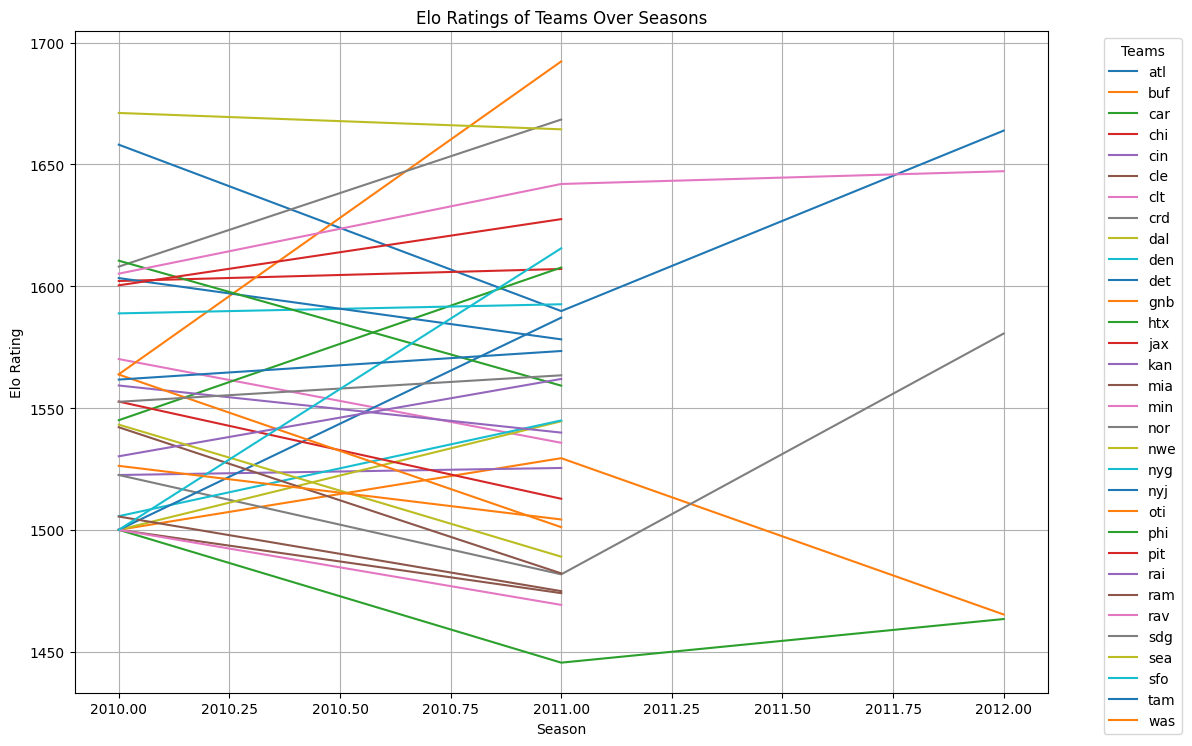

In [53]:
import matplotlib.pyplot as plt

# Group by team and plot Elo ratings over time
team_elo_df = feature_df.groupby(['Season', 'Team'])['Team_Elo'].max().reset_index()

# Loop through each team and plot its Elo over seasons
plt.figure(figsize=(12, 8))
for team in team_elo_df['Team'].unique():
    team_data = team_elo_df[team_elo_df['Team'] == team]
    plt.plot(team_data['Season'], team_data['Team_Elo'], label=team)

plt.title('Elo Ratings of Teams Over Seasons')
plt.xlabel('Season')
plt.ylabel('Elo Rating')
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1376/2567954780.py:30: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  teams_to_plot = pd.concat([bottom_5, top_5, lions_elo]).drop_duplicates().index.tolist()


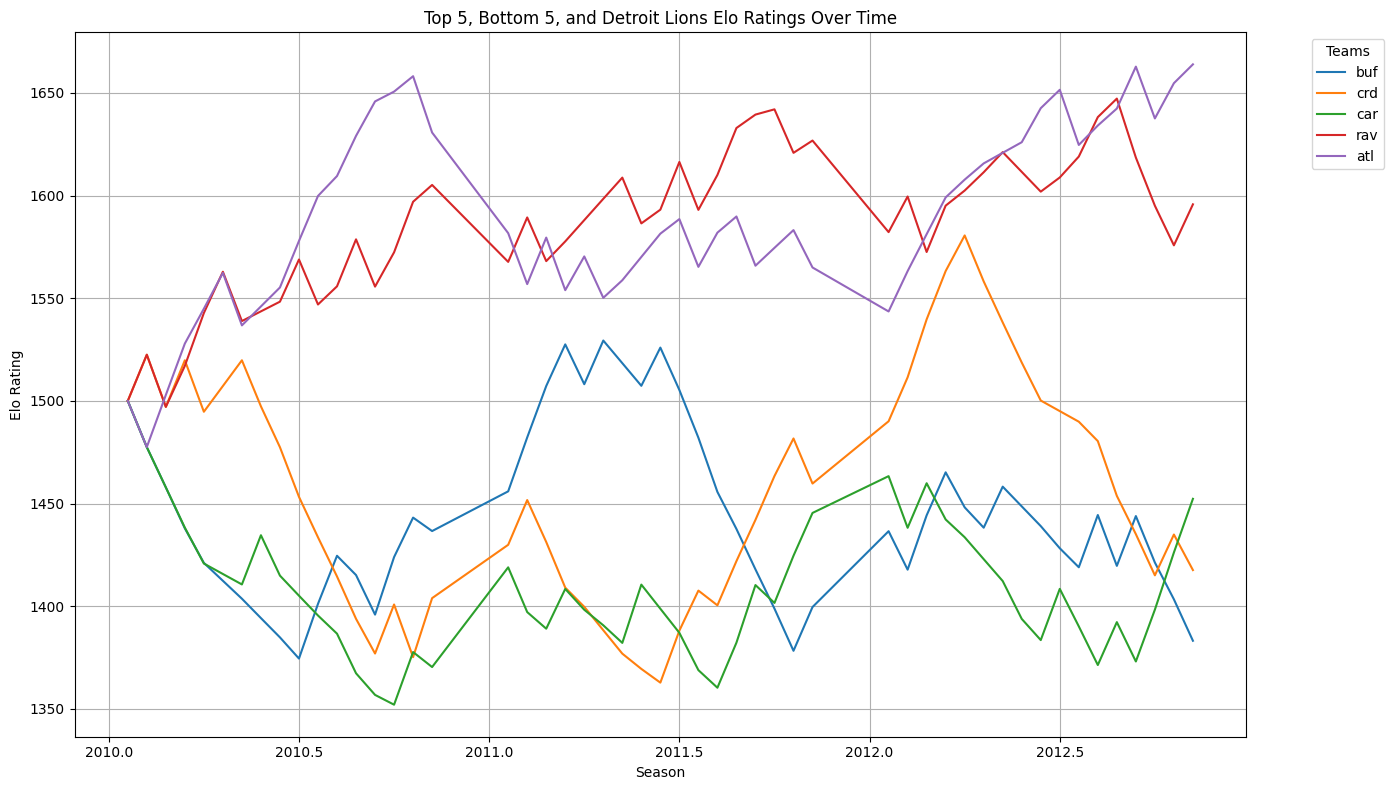

In [54]:
import matplotlib.pyplot as plt

# Ensure Elo is numeric
feature_df['Team_Elo'] = pd.to_numeric(feature_df['Team_Elo'], errors='coerce')

# Get last season and week
final_season = feature_df['Season'].max()
final_week = feature_df[feature_df['Season'] == final_season]['Week'].max()

# Get final Elo values by team from the last game
final_elos = (
    feature_df[(feature_df['Season'] == final_season) & (feature_df['Week'] == final_week)]
    .groupby('Team')['Team_Elo']
    .mean()
    .sort_values()
)

# Get bottom 5 and top 5 teams
bottom_5 = final_elos.head(5)
top_5 = final_elos.tail(5)

# Always include Detroit Lions
lions_code = 'det'
if lions_code in final_elos.index:
    lions_elo = pd.Series(final_elos[lions_code], index=[lions_code])
else:
    lions_elo = pd.Series()

# Combine and get unique team list
teams_to_plot = pd.concat([bottom_5, top_5, lions_elo]).drop_duplicates().index.tolist()

# Plot Elo ratings over time
plt.figure(figsize=(14, 8))
for team in teams_to_plot:
    team_data = feature_df[feature_df['Team'] == team]
    plt.plot(
        team_data['Season'] + team_data['Week'] / 20,  # smoother x-axis
        team_data['Team_Elo'],
        label=team.upper() if team == 'det' else team
    )

plt.title('Top 5, Bottom 5, and Detroit Lions Elo Ratings Over Time')
plt.xlabel('Season')
plt.ylabel('Elo Rating')
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
lions_history = feature_df[feature_df['Team'] == 'det'][['Season', 'Week', 'Team_Elo']].sort_values(by=['Season', 'Week'])
print(lions_history.to_string(index=False))
feature_df.to_csv('final_data.csv', index=False)

 Season  Week    Team_Elo
   2010   1.0 1500.000000
   2010   2.0 1477.500000
   2010   3.0 1455.000000
   2010   4.0 1432.687672
   2010   5.0 1415.701715
   2010   6.0 1443.887926
   2010   8.0 1426.710925
   2010   9.0 1455.486949
   2010  10.0 1439.180806
   2010  11.0 1412.541889
   2010  12.0 1390.737079
   2010  13.0 1384.021804
   2010  14.0 1376.520289
   2010  15.0 1398.835294
   2010  16.0 1419.632800
   2010  17.0 1447.586025
   2011   1.0 1483.027128
   2011   2.0 1509.115323
   2011   3.0 1530.266049
   2011   4.0 1546.550014
   2011   5.0 1566.654946
   2011   6.0 1587.120644
   2011   7.0 1561.619137
   2011   8.0 1538.934521
   2011  10.0 1549.077220
   2011  11.0 1528.325006
   2011  12.0 1536.887479
   2011  13.0 1527.164466
   2011  14.0 1510.469275
   2011  15.0 1520.240219
   2011  16.0 1543.521297
   2011  17.0 1563.912328


In [56]:
# Calculate Point_Diff first
feature_df['Point_Diff'] = feature_df['Pts'] - feature_df['PtsO']
rolling_window = 3

# Calculate rolling point differential for each team WITHOUT groupby-apply
feature_df['Rolling_Point_Diff'] = feature_df.groupby('Team')['Point_Diff'].transform(
    lambda x: x.shift(1).rolling(window=rolling_window, min_periods=2).mean()
)

# Now filter for ATL data
atl_data = feature_df[feature_df['Team'] == 'atl'][['Season', 'Week', 'Team', 'Point_Diff', 'Rolling_Point_Diff']]

first_games = atl_data.groupby('Season').first()
print("First game of each season for ATL:")
print(first_games)

# Let's also check the first few games of each season
print("\nFirst few games of each season for ATL:")
for season, group in atl_data.groupby('Season'):
    print(f"\nSeason {season}:")
    print(group.head(3))

First game of each season for ATL:
        Week Team  Point_Diff  Rolling_Point_Diff
Season                                           
2010     1.0  atl          -6           14.000000
2011     1.0  atl         -18           11.333333
2012     1.0  atl          16            6.333333

First few games of each season for ATL:

Season 2010:
   Season  Week Team  Point_Diff  Rolling_Point_Diff
0    2010   1.0  atl          -6                 NaN
1    2010   2.0  atl          34                 NaN
2    2010   3.0  atl           3                14.0

Season 2011:
    Season  Week Team  Point_Diff  Rolling_Point_Diff
16    2011   1.0  atl         -18           11.333333
17    2011   2.0  atl           4            0.000000
18    2011   3.0  atl          -3            2.333333

Season 2012:
    Season  Week Team  Point_Diff  Rolling_Point_Diff
32    2012   1.0  atl          16            6.333333
33    2012   2.0  atl           6            2.666667
34    2012   3.0  atl          24         

Enhanced Week 1 Handling, Matchup Merging & Differential Features

Transform the team-by-team data into game-level matchup data with proper handling of early-season missing values and create powerful differential features.

In [33]:
# FRESH START - Clear all variables to avoid pandas caching issues
print("=== CLEARING ALL VARIABLES FOR FRESH START ===")

# Clear all variables except imports
for var in list(globals().keys()):
    if not var.startswith('_') and var not in ['np', 'pd', 'plt', 'random', 'time', 're']:
        del globals()[var]

print("✅ All variables cleared!")

# Enhanced Week 1 Handling - Fill NaN values with prior season final averages
# Load the data that has all the rolling features
model_df = pd.read_csv('model_data.csv')

print(f"Original data shape: {model_df.shape}")
print(f"Columns ending in '_rollingavg3': {len([c for c in model_df.columns if c.endswith('_rollingavg3')])}")

# Get all rolling average columns
rolling_cols = [c for c in model_df.columns if c.endswith('_rollingavg3')]

# For each team, calculate final season averages (excluding the current season)
# We'll use these to seed Week 1 of the following season
def fill_week1_with_prior_season_avg(df, rolling_cols):
    df_filled = df.copy()
    
    # Sort by Team, Season, Week to ensure proper order
    df_filled = df_filled.sort_values(['Team', 'Season', 'Week']).reset_index(drop=True)
    
    for team in df_filled['Team'].unique():
        team_data = df_filled[df_filled['Team'] == team]
        
        for season in sorted(team_data['Season'].unique()):
            # Get Week 1 games for this team/season
            week1_mask = (df_filled['Team'] == team) & (df_filled['Season'] == season) & (df_filled['Week'] == 1)
            
            if season > team_data['Season'].min():  # Not the first season for this team
                # Get prior season data
                prior_season = season - 1
                prior_data = team_data[team_data['Season'] == prior_season]
                
                if not prior_data.empty:
                    # Calculate final averages from prior season (last 3-5 games work well)
                    prior_final_avg = prior_data[rolling_cols].tail(5).mean()  # Use last 5 games average
                    
                    # Fill Week 1 NaN values with prior season averages
                    for col in rolling_cols:
                        if pd.isna(df_filled.loc[week1_mask, col]).any():
                            df_filled.loc[week1_mask, col] = df_filled.loc[week1_mask, col].fillna(prior_final_avg[col])
    
    return df_filled

# Apply the enhanced Week 1 handling
print("Applying enhanced Week 1 handling...")
model_df_enhanced = fill_week1_with_prior_season_avg(model_df, rolling_cols)

# Check improvement
week1_data = model_df_enhanced[(model_df_enhanced['Week'] == 1)]
print(f"Week 1 NaN values before: {model_df[model_df['Week'] == 1][rolling_cols].isna().sum().sum()}")
print(f"Week 1 NaN values after: {week1_data[rolling_cols].isna().sum().sum()}")

# Fill any remaining NaNs with league averages (for teams' first seasons in dataset)
for col in rolling_cols:
    league_avg = model_df_enhanced[col].mean()
    model_df_enhanced[col] = model_df_enhanced[col].fillna(league_avg)

print("Enhanced Week 1 handling completed!")
print("✅ Step 4 Complete - Ready for Step 5")

=== CLEARING ALL VARIABLES FOR FRESH START ===
✅ All variables cleared!
Original data shape: (7806, 150)
Columns ending in '_rollingavg3': 28
Applying enhanced Week 1 handling...
Week 1 NaN values before: 0
Week 1 NaN values after: 0
Enhanced Week 1 handling completed!
✅ Step 4 Complete - Ready for Step 5
Week 1 NaN values before: 0
Week 1 NaN values after: 0
Enhanced Week 1 handling completed!
✅ Step 4 Complete - Ready for Step 5


In [35]:
# Step 5: Create Game ID and Prepare Matchup Data
# Create unique game identifiers for merging home/away data

def create_game_id(row):
    """Create consistent game ID regardless of home/away perspective"""
    teams = sorted([row['Team'], row['Opp']])
    return f"{row['Season']}_W{row['Week']:02d}_{teams[0]}_vs_{teams[1]}"

# Add Game ID
model_df_enhanced['Game_ID'] = model_df_enhanced.apply(create_game_id, axis=1)

# Verify Game IDs
print(f"Total rows: {len(model_df_enhanced)}")
print(f"Unique Game IDs: {model_df_enhanced['Game_ID'].nunique()}")
print(f"Expected unique games: {len(model_df_enhanced) // 2}")  # Should be roughly half since each game has 2 rows

# Check for any issues
game_counts = model_df_enhanced['Game_ID'].value_counts()
if (game_counts != 2).any():
    print(f"Warning: {(game_counts != 2).sum()} games don't have exactly 2 rows")
    print("Sample problematic games:")
    print(game_counts[game_counts != 2].head())

# Define the three target variables
model_df_enhanced['spread_target'] = model_df_enhanced['Pts'] - model_df_enhanced['PtsO']
model_df_enhanced['total_target'] = model_df_enhanced['Total Score']
model_df_enhanced['win_target'] = (model_df_enhanced['Pts'] > model_df_enhanced['PtsO']).astype(int)

print("Game IDs created and targets defined!")
print(f"Sample Game IDs: {model_df_enhanced['Game_ID'].head()}")
model_df_enhanced.head()

Total rows: 7806
Unique Game IDs: 3903
Expected unique games: 3903
Game IDs created and targets defined!
Sample Game IDs: 0    2010_W01_atl_vs_pit
1    2010_W02_atl_vs_crd
2    2010_W03_atl_vs_nor
3    2010_W04_atl_vs_sfo
4    2010_W05_atl_vs_cle
Name: Game_ID, dtype: object


,Season,Team,Gtm,Week,Date,H/A,Day,Opp,Rslt,Pts,...,Win,Season_Wins,Record,Win PCT,Team_Elo,Opp_Elo,Game_ID,spread_target,total_target,win_target
0,2010,atl,1,1,2010-09-12,1,Sun,pit,L,9,...,0.0,0.0,0.0-1.0,0.000000,1500.000000,1500.000000,2010_W01_atl_vs_pit,-6,24,0
1,2010,atl,2,2,2010-09-19,0,Sun,crd,W,41,...,1.0,1.0,1.0-1.0,0.500000,1477.500000,1522.500000,2010_W02_atl_vs_crd,34,48,1
2,2010,atl,3,3,2010-09-26,1,Sun,nor,W,27,...,1.0,2.0,2.0-1.0,0.666667,1502.898022,1542.101978,2010_W03_atl_vs_nor,3,51,1
3,2010,atl,4,4,2010-10-03,0,Sun,sfo,W,16,...,1.0,3.0,3.0-1.0,0.750000,1527.926158,1440.746771,2010_W04_atl_vs_sfo,2,30,1
4,2010,atl,5,5,2010-10-10,1,Sun,cle,W,20,...,1.0,4.0,4.0-1.0,0.800000,1544.895982,1465.797501,2010_W05_atl_vs_cle,10,30,1


In [36]:
# Step 5 Continued: Create Home/Away DataFrames and Merge Matchup Data

# Separate home and away teams
home_games = model_df_enhanced[model_df_enhanced['H/A'] == 0].copy()  # H/A = 0 means home
away_games = model_df_enhanced[model_df_enhanced['H/A'] == 1].copy()  # H/A = 1 means away

print(f"Home games: {len(home_games)}")
print(f"Away games: {len(away_games)}")

# Define columns to keep for features (safe columns only)
safe_feature_cols = [
    'Game_ID', 'Season', 'Week', 'Team', 'Opp', 'Date', 'IsInternational',
    'Team_Elo', 'Opp_Elo', 'Season_Weight'
] + rolling_cols

# Define target columns (only keep from home perspective)
target_cols = ['spread_target', 'total_target', 'win_target']

# Create home team dataframe with "H_" prefix
home_df = home_games[safe_feature_cols + target_cols].copy()
home_df = home_df.rename(columns={col: f'H_{col}' if col not in ['Game_ID', 'Season', 'Week', 'Date', 'IsInternational'] + target_cols else col 
                                  for col in home_df.columns})

# Create away team dataframe with "A_" prefix  
away_df = away_games[safe_feature_cols].copy()
away_df = away_df.rename(columns={col: f'A_{col}' if col not in ['Game_ID'] else col 
                                  for col in away_df.columns})

# Merge on Game_ID to create one row per game
matchup_df = pd.merge(home_df, away_df, on='Game_ID', how='inner')

print(f"Merged matchup data shape: {matchup_df.shape}")
print(f"Games successfully merged: {len(matchup_df)}")

# Verify the merge worked correctly
print(f"Example merged game:")
print(matchup_df[['Game_ID', 'H_Team', 'A_Team', 'H_Opp', 'A_Opp']].head(1))

# Quick sanity check: H_Team should equal A_Opp and vice versa
assert (matchup_df['H_Team'] == matchup_df['A_Opp']).all(), "Home team should match away opponent"
assert (matchup_df['H_Opp'] == matchup_df['A_Team']).all(), "Home opponent should match away team"

print("Matchup merge completed successfully!")
matchup_df.head()
#matchup_df.to_csv('matchup_data.csv', index=False)

Home games: 3950
Away games: 3856
Merged matchup data shape: (3856, 78)
Games successfully merged: 3856
Example merged game:
               Game_ID H_Team A_Team H_Opp A_Opp
0  2010_W02_atl_vs_crd    atl    crd   crd   atl
Matchup merge completed successfully!


,Game_ID,Season,Week,H_Team,H_Opp,Date,IsInternational,H_Team_Elo,H_Opp_Elo,H_Season_Weight,...,A_ToP Ratio_rollingavg3,A_Def Pts Allowed Per Min of Poss_rollingavg3,A_Def Yds Allowed Per Min of Poss_rollingavg3,A_3DConv_rollingavg3,A_4DConv_rollingavg3,A_3D Success_rollingavg3,A_4D Success_rollingavg3,A_3d Stop Rate_rollingavg3,A_4d Stop Rate_rollingavg3,A_Sk Rate_rollingavg3
0,2010_W02_atl_vs_crd,2010,2,atl,crd,2010-09-19,0,1477.500000,1522.500000,0.228768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2010_W04_atl_vs_sfo,2010,4,atl,sfo,2010-10-03,0,1527.926158,1440.746771,0.228768,...,0.479167,0.939726,10.391279,3.333333,1.333333,0.285839,0.444444,0.538961,0.166667,0.032037
2,2010_W07_atl_vs_cin,2010,7,atl,cin,2010-10-24,0,1536.785665,1473.755245,0.228768,...,0.528796,0.610932,11.246899,4.666667,0.666667,0.352118,0.333333,0.645022,0.333333,0.049784
3,2010_W09_atl_vs_tam,2010,9,atl,tam,2010-11-07,0,1555.248000,1557.504162,0.228768,...,0.501759,0.921032,12.813194,5.000000,1.666667,0.355556,0.888889,0.403846,0.166667,0.021154
4,2010_W10_atl_vs_rav,2010,10,atl,rav,2010-11-11,0,1577.894108,1568.876250,0.228768,...,0.529300,0.681195,12.891692,4.333333,0.666667,0.318619,0.500000,0.522409,0.500000,0.050087


In [37]:
# Step 6: Create Powerful Differential Features

# Create Elo differential
matchup_df['Elo_Diff'] = matchup_df['H_Team_Elo'] - matchup_df['A_Team_Elo']

# Get rolling average columns that we want to create differentials for
home_rolling_cols = [col for col in matchup_df.columns if col.startswith('H_') and col.endswith('_rollingavg3')]
away_rolling_cols = [col for col in matchup_df.columns if col.startswith('A_') and col.endswith('_rollingavg3')]

# Create basic home-away differentials for all rolling features
print("Creating basic home-away differentials...")
for h_col in home_rolling_cols:
    # Find corresponding away column
    base_col = h_col[2:]  # Remove 'H_' prefix
    a_col = f'A_{base_col}'
    
    if a_col in matchup_df.columns:
        diff_col = f'Diff_{base_col}'
        matchup_df[diff_col] = matchup_df[h_col] - matchup_df[a_col]

# Create offense vs defense matchup differentials (these are especially powerful)
print("Creating offense vs defense matchup differentials...")

# Offensive efficiency vs defensive efficiency matchups
offense_defense_pairs = [
    ('H_Pts per Play_rollingavg3', 'A_Pts Allowed per Play_rollingavg3', 'OffPtsPerPlay_vs_DefPtsAllowed'),
    ('H_Y/P_rollingavg3', 'A_Yds Allowed per Play_rollingavg3', 'OffYdsPerPlay_vs_DefYdsAllowed'),
    ('H_Points Per Drive_rollingavg3', 'A_Def Pts Allowed Per Min of Poss_rollingavg3', 'OffPtsPerDrive_vs_DefPtsPerPoss'),
    ('H_3D Success_rollingavg3', 'A_3d Stop Rate_rollingavg3', 'Off3DSuccess_vs_Def3DStop'),
    ('H_4D Success_rollingavg3', 'A_4d Stop Rate_rollingavg3', 'Off4DSuccess_vs_Def4DStop'),
    ('H_Turnover Percentage_rollingavg3', 'A_Defensive TO Percentage_rollingavg3', 'OffTORate_vs_DefTORate'),
]

for h_off, a_def, diff_name in offense_defense_pairs:
    if h_off in matchup_df.columns and a_def in matchup_df.columns:
        matchup_df[diff_name] = matchup_df[h_off] - matchup_df[a_def]

# Create some combined efficiency metrics
print("Creating combined efficiency metrics...")

# Total team efficiency differentials
matchup_df['Total_Offensive_Efficiency_Diff'] = (
    matchup_df.get('Diff_Pts per Play_rollingavg3', 0) + 
    matchup_df.get('Diff_Y/P_rollingavg3', 0) + 
    matchup_df.get('Diff_Points Per Drive_rollingavg3', 0)
) / 3

matchup_df['Total_Defensive_Efficiency_Diff'] = (
    matchup_df.get('Diff_3d Stop Rate_rollingavg3', 0) + 
    matchup_df.get('Diff_4d Stop Rate_rollingavg3', 0) + 
    matchup_df.get('Diff_Defensive TO Percentage_rollingavg3', 0)
) / 3

# Check what columns are actually available
print(f"Available columns in matchup_df: {sorted(matchup_df.columns)}")

# Get the final feature columns (only include columns that actually exist)
base_feature_columns = ['Game_ID', 'Season', 'Week', 'Date', 'IsInternational', 'Elo_Diff']
# Only include columns that exist
feature_columns = [col for col in base_feature_columns if col in matchup_df.columns]

# Add differential columns (excluding Elo_Diff since it's already included above)
diff_columns = [col for col in matchup_df.columns if col.startswith('Diff_') and col != 'Elo_Diff']
feature_columns += diff_columns

# Add vs columns and other _Diff columns (excluding Elo_Diff)
vs_and_diff_columns = [col for col in matchup_df.columns if ('_vs_' in col or col.endswith('_Diff')) and col != 'Elo_Diff']
feature_columns += vs_and_diff_columns

# Add Season_Weight if it exists (from home team)
if 'H_Season_Weight' in matchup_df.columns:
    feature_columns.append('H_Season_Weight')

# Remove any duplicates that might have slipped through
feature_columns = list(dict.fromkeys(feature_columns))  # Preserves order while removing duplicates

target_columns = ['spread_target', 'total_target', 'win_target']

print(f"Final feature columns: {feature_columns}")
print(f"Elo_Diff count in features: {feature_columns.count('Elo_Diff')}")  # Should be 1

# Create final modeling dataset
final_modeling_data = matchup_df[feature_columns + target_columns].copy()

print(f"Final modeling dataset shape: {final_modeling_data.shape}")
print(f"Features created: {len(feature_columns)}")
print(f"Sample feature columns: {feature_columns[:10]}")

# Save the final dataset
final_modeling_data.to_csv('final_modeling_dataset.csv', index=False)
print("Final modeling dataset saved as 'final_modeling_dataset.csv'")

# Display summary statistics
print(f"\nTarget variable distributions:")
print(f"Spread target mean: {final_modeling_data['spread_target'].mean():.2f} (should be ~2-3 for home teams)")
print(f"Total target mean: {final_modeling_data['total_target'].mean():.1f}")  
print(f"Win rate: {final_modeling_data['win_target'].mean():.3f} (should be ~0.57 for home teams)")

print("\nDifferential features summary:")
diff_cols = [col for col in final_modeling_data.columns if col.startswith('Diff_') or '_vs_' in col or col.endswith('_Diff')]
print(f"Number of differential features: {len(diff_cols)}")
print("Top differential features by variance:")
print(final_modeling_data[diff_cols].var().sort_values(ascending=False).head(10))
final_modeling_data.tail()

Creating basic home-away differentials...
Creating offense vs defense matchup differentials...
Creating combined efficiency metrics...
Available columns in matchup_df: ['A_3D Success_rollingavg3', 'A_3DConv_rollingavg3', 'A_3d Stop Rate_rollingavg3', 'A_4D Success_rollingavg3', 'A_4DConv_rollingavg3', 'A_4d Stop Rate_rollingavg3', 'A_Date', 'A_Def Pts Allowed Per Min of Poss_rollingavg3', 'A_Def Yds Allowed Per Min of Poss_rollingavg3', 'A_Defensive TO Percentage_rollingavg3', 'A_IsInternational', 'A_Opp', 'A_Opp_Elo', 'A_Opp_TO_rollingavg3', 'A_Opp_ToP_Minutes_rollingavg3', 'A_Opp_Tot_rollingavg3', 'A_Opp_Y/P_rollingavg3', 'A_Points Per Drive_rollingavg3', 'A_Pts Per Min of Poss_rollingavg3', 'A_Pts per Play_rollingavg3', 'A_PtsO_rollingavg3', 'A_Pts_rollingavg3', 'A_Season', 'A_Season_Weight', 'A_Sk Rate_rollingavg3', 'A_TO_rollingavg3', 'A_Team', 'A_Team_Elo', 'A_ToP Ratio_rollingavg3', 'A_ToP_Minutes_rollingavg3', 'A_Tot_rollingavg3', 'A_Turnover Diff_rollingavg3', 'A_Turnover Perc

,Game_ID,Season,Week,Date,IsInternational,Elo_Diff,Diff_Pts_rollingavg3,Diff_PtsO_rollingavg3,Diff_Tot_rollingavg3,Diff_Opp_Tot_rollingavg3,...,OffPtsPerDrive_vs_DefPtsPerPoss,Off3DSuccess_vs_Def3DStop,Off4DSuccess_vs_Def4DStop,OffTORate_vs_DefTORate,Total_Offensive_Efficiency_Diff,Total_Defensive_Efficiency_Diff,H_Season_Weight,spread_target,total_target,win_target
3851,2024_W10_pit_vs_was,2024,10,2024-11-10,0,-49.796434,-3.333333,-0.666667,44.000000,-59.666667,...,2.968925,-0.311616,-0.055556,-0.038738,0.280719,0.066697,1.0,-1,55,0
3852,2024_W12_dal_vs_was,2024,12,2024-11-24,0,28.937915,11.666667,-6.333333,-16.000000,7.666667,...,1.692224,-0.323843,0.333333,-0.010824,0.613652,-0.062497,1.0,-8,60,0
3853,2024_W13_oti_vs_was,2024,13,2024-12-01,0,79.974466,3.000000,3.666667,-11.333333,63.666667,...,1.115479,-0.357204,0.166667,0.008545,-0.218330,0.033021,1.0,23,61,1
3854,2024_W16_phi_vs_was,2024,16,2024-12-22,0,-172.856267,5.000000,8.000000,85.333333,-5.000000,...,2.249813,-0.118966,0.366667,0.006293,0.156019,0.044823,1.0,3,69,1
3855,2024_W17_atl_vs_was,2024,17,2024-12-29,0,50.296587,9.333333,4.333333,23.666667,-29.333333,...,2.534485,-0.001185,0.555556,-0.003196,0.132595,0.043989,1.0,6,54,1
